# Final 서베이 예측

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # train/test
from sklearn.datasets import load_wine # dataset 
from sklearn.metrics import accuracy_score, confusion_matrix # 평가 : 분류정확도 
from sklearn.metrics import classification_report # 평가 : 정확률, 재현율, f1_score
from sklearn.model_selection import train_test_split
df = pd.read_csv("data/finalservey_1912_clean.csv")
def rating(mens_cramp):
    if mens_cramp >= 8: return 2
    elif mens_cramp >= 7: return 1
    else: return 0
df['mens_cramp_rank'] = df.apply(lambda x: rating(x['mens_cramp']),axis=1)

X = df[['height_1', 'weight_1', 'bmi', 'mens_period', 'mens_cycle', 'age', 'upper_body_size', 'lower_body_size', 'options_tension', 'options_stiffness', 'options_diarrhea', 'options_insomnia', 'options_abdominal_obesity', 'options_swelling', 'options_cold', 'exercise_type_walking', 'exercise_type_running', 'exercise_type_hiking', 'exercise_type_bicycle', 'exercise_type_golf', 'exercise_type_yoga_pilates', 'exercise_type_swimming', 'exercise_type_dance', 'exercise_type_fitness', 'thyroid_no', 'thyroid_hypothyroidism', 'thyroid_hyperthyroidism', 'thyroid_cancer', 'mens_disease_no', 'mens_disease_pms', 'mens_disease_fibroids', 'mens_disease_uterine_adenoma', 'menarche_age', 'mens_supplies_pad', 'mens_supplies_cotton_pad', 'mens_supplies_tampon', 'mens_supplies_cup', 'mens_cramp_peak_before', 'mens_cramp_peak_first_day', 'mens_cramp_peak_second_day', 'mens_cramp_peak_third_day', 'mens_stress', 'mens_stress_peak_before', 'mens_stress_peak_first_day', 'mens_stress_peak_second_day', 'mens_stress_peak_third_day', 'mens_cramp_part_belly', 'mens_cramp_part_pelvis', 'mens_cramp_part_waist', 'mens_cramp_part_below_thigh', 'mens_cramp_symptoms_swelling', 'mens_cramp_symptoms_emotion', 'mens_cramp_symptoms_belly_pain', 'mens_cramp_symptoms_constipation', 'mens_cramp_symptoms_lethargy', 'mens_cramp_symptoms_nervousness', 'mens_cramp_symptoms_indigestion', 'mens_cramp_symptoms_gas', 'mens_cramp_symptoms_diarrhea', 'mens_cramp_symptoms_digestive_upset', 'mens_cramp_symptoms_back_pain', 'mens_cramp_symptoms_chest_pain', 'mens_cramp_symptoms_increased_appetite', 'mens_cramp_symptoms_headache', 'mens_cramp_symptoms_depression', 'mens_cramp_symptoms_reduced_temperance', 'mens_cramp_symptoms_migraine', 'mens_cramp_symptoms_drowsiness', 'mens_cramp_symptoms_sensitive_temperature', 'mens_cramp_symptoms_colic', 'mens_cramp_symptoms_leg_numbness', 'mens_cramp_symptoms_leg_swelling', 'mens_cramp_symptoms_voracity', 'mens_cramp_symptoms_insomnia', 'mens_cramp_symptoms_anxiety', 'mens_cramp_symptoms_nausea', 'mens_cramp_symptoms_decreased_appetite', 'mens_cramp_symptoms_excessive_sleep', 'mens_cramp_symptoms_pimple', 'mens_cramp_symptoms_sickness', 'mens_cramp_symptoms_exhaustion', 'mens_cramp_symptoms_breathing_problem', 'mens_cramp_symptoms_dull_movement', 'mens_cramp_symptoms_gastrointestinal_disorder', 'mens_cramp_symptoms_muscle_pain', 'mens_cramp_symptoms_increased_libido', 'mens_cramp_symptoms_cold_sweat', 'mens_cramp_symptoms_dizziness', 'mens_cramp_symptoms_throw_up', 'mens_cramp_symptoms_abdominal_swelling', 'mens_cramp_symptoms_anemia', 'mens_cramp_symptoms_whirl', 'mens_cramp_symptoms_joint_pain', 'mens_cramp_symptoms_sweet', 'mens_cramp_symptoms_fever', 'mens_cramp_symptoms_chill', 'mens_cramp_symptoms_orthostatic_hypotension', 'mens_cramps_family_mother', 'mens_cramps_family_older_sister', 'mens_cramps_family_younger_sister', 'mens_cramps_family_relatives', 'mens_cramps_family_no', 'mens_symptoms_3_ovulation_cramps', 'mens_symptoms_3_long_cramps', 'mens_symptoms_3_abnormal', 'mens_symptoms_3_pressure', 'mens_symptoms_3_lump', 'mens_symptoms_3_abdominal_pain', 'mens_symptoms_3_gas', 'mens_symptoms_3_pelvis_pain', 'mens_symptoms_3_long_period', 'mens_symptoms_3_irregular_blood', 'mens_symptoms_3_waist_pain', 'mens_symptoms_3_stressful', 'mens_symptoms_3_cluster_blood', 'mens_symptoms_3_diarrhea', 'mens_symptoms_3_urination', 'mens_symptoms_3_irregular_blood_amount', 'mens_symptoms_3_intense_pain', 'mens_symptoms_3_stomachache', 'mens_before_after_pattern_toilet', 'mens_before_after_pattern_app', 'mens_before_after_pattern_embarrassment', 'mens_before_after_pattern_sex_nervousness', 'mens_before_after_pattern_sex_calculate_date', 'mens_before_after_pattern_sexual_desire', 'mens_before_after_pattern_accommodation', 'mens_before_after_pattern_keen', 'mens_before_after_pattern_cancellation', 'mens_before_after_pattern_work', 'mens_before_after_pattern_withstand', 'mens_before_after_pattern_urgent_cancellation', 'mens_before_after_pattern_sweet_spicy', 'mens_before_after_pattern_buy_comfy', 'mens_before_after_pattern_fancy', 'mens_before_after_pattern_partying', 'mens_before_after_pattern_comfy_clothes', 'mens_before_after_pattern_dark_clothes', 'mens_before_after_pattern_accessory', 'mens_before_after_pattern_heavy_makeup', 'mens_before_after_pattern_deceive', 'mens_before_after_pattern_help', 'mens_before_after_pattern_buy_pads', 'mens_before_after_pattern_borrow_pads', 'mens_before_after_pattern_bulk_purchase_pads', 'mens_before_after_pattern_excitement', 'mens_before_after_pattern_panty_blood', 'mens_before_after_pattern_throw_out_panty', 'mens_before_after_pattern_chest_lump', 'mens_before_after_pattern_weight_changes', 'mens_before_after_pattern_same_weight', 'mens_meal', 'mens_exercise', 'mens_cramps_level_before_meal_exercise', 'mens_cramps_level_after_meal_exercise', 'meal_exercise_effects', 'meal_exercise_effects_specific_reduced_cramps', 'meal_exercise_effects_specific_reduced_stress', 'meal_exercise_effects_specific_reduced_pain', 'meal_exercise_effects_specific_lose_weight', 'meal_exercise_effects_specific_gain_weight', 'meal_exercise_effects_specific_same_weight', 'meal_exercise_effects_specific_improved_inbody', 'meal_exercise_effects_specific_same_inbody', 'meal_exercise_effects_specific_no_pain', 'meal_exercise_effects_specific_no_pms', 'meal_exercise_effects_specific_no', 'weight_3_1', 'improvements_self_measurement', 'improvements_plan', 'improvements_results', 'improvements_hospital', 'improvements_1.1', 'meal_exercise_effects_c', 'pain_after']]
y = df['mens_cramp_rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 400)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy is: ", accuracy_score(y_pred, y_test))

con_mat = confusion_matrix(y_pred, y_test)
print(con_mat)

report = classification_report(y_pred, y_test)
print(report)

features = X_train.columns.values
print("---- Training Done ----")

trace = go.Scatter(
    y = model.feature_importances_,
    x = features,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = model.feature_importances_,
        colorscale='Portland',
        showscale = True
    ),
    text = features
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random Forest Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data, layout = layout)
py.iplot(fig, filename = 'scatter2010')

x, y = (list(x) for x in zip(*sorted(zip(model.feature_importances_, features), reverse = False)))
trace2 = go.Bar(
    x = x,
    y = y,
    marker = dict(
        color = x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name = 'Random Forest Feature importance',
    orientation = 'h'
)

layout = dict(
    title = 'Barplot of Feature importances',
    width = 900, height = 2000,
    yaxis = dict(
        showgrid = False,
        showline = False,
        showticklabels = True
    )
)

fig1 = go.Figure(data = [trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename = 'plots')

def plot_feature_importances_

Accuracy is:  0.6025641025641025
[[ 5  2  1]
 [ 1  4  0]
 [10 17 38]]
              precision    recall  f1-score   support

           0       0.31      0.62      0.42         8
           1       0.17      0.80      0.29         5
           2       0.97      0.58      0.73        65

    accuracy                           0.60        78
   macro avg       0.49      0.67      0.48        78
weighted avg       0.86      0.60      0.67        78

---- Training Done ----


In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # train/test
from sklearn.datasets import load_wine # dataset 
from sklearn.metrics import accuracy_score, confusion_matrix # 평가 : 분류정확도 
from sklearn.metrics import classification_report # 평가 : 정확률, 재현율, f1_score
from sklearn.model_selection import train_test_split
df = pd.read_csv("data/finalservey_1912_clean.csv")
def rating(mens_cramp):
    if mens_cramp >= 8: return 2
    elif mens_cramp >= 7: return 1
    else: return 0
df['mens_cramp_rank'] = df.apply(lambda x: rating(x['mens_cramp']),axis=1)

X = df[['mens_cramps_level_before_meal_exercise', 'mens_stress', 'mens_cramps_level_after_meal_exercise', 'bmi', 'height_1', 'age', 'weight_1', 'lower_body_size', 'upper_body_size', 'mens_cycle', 'menarche_age', 'pain_after', 'mens_exercise', 'mens_period', 'mens_meal', 'mens_symptoms_3_ovulation_cramps', 'meal_exercise_effects', 'mens_cramp_symptoms_reduced_temperance', 'mens_cramps_family_no', 'meal_exercise_effects_specific_no_pms', 'exercise_type_bicycle', 'meal_exercise_effects_c', 'mens_stress_peak_before', 'exercise_type_yoga_pilates', 'mens_cramp_symptoms_lethargy', 'options_abdominal_obesity', 'mens_symptoms_3_pressure', 'mens_cramps_family_relatives', 'options_tension', 'meal_exercise_effects_specific_reduced_stress', 'mens_symptoms_3_abnormal', 'mens_cramp_symptoms_diarrhea', 'mens_symptoms_3_pelvis_pain', 'mens_cramp_part_waist', 'mens_cramp_symptoms_exhaustion', 'mens_cramp_peak_second_day', 'mens_before_after_pattern_help', 'mens_cramp_symptoms_colic', 'mens_before_after_pattern_borrow_pads', 'mens_symptoms_3_gas']]
y = df['mens_cramp_rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 400)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy is: ", accuracy_score(y_pred, y_test))

con_mat = confusion_matrix(y_pred, y_test)
print(con_mat)

report = classification_report(y_pred, y_test)
print(report)

features = X_train.columns.values
print("---- Training Done ----")

trace = go.Scatter(
    y = model.feature_importances_,
    x = features,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = model.feature_importances_,
        colorscale='Portland',
        showscale = True
    ),
    text = features
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random Forest Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data, layout = layout)
py.iplot(fig, filename = 'scatter2010')

x, y = (list(x) for x in zip(*sorted(zip(model.feature_importances_, features), reverse = False)))
trace2 = go.Bar(
    x = x,
    y = y,
    marker = dict(
        color = x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name = 'Random Forest Feature importance',
    orientation = 'h'
)

layout = dict(
    title = 'Barplot of Feature importances',
    width = 900, height = 2000,
    yaxis = dict(
        showgrid = False,
        showline = False,
        showticklabels = True
    )
)

fig1 = go.Figure(data = [trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename = 'plots')

Accuracy is:  0.7051282051282052
[[ 7  0  1]
 [ 7  6  4]
 [ 4  7 42]]
              precision    recall  f1-score   support

           0       0.39      0.88      0.54         8
           1       0.46      0.35      0.40        17
           2       0.89      0.79      0.84        53

    accuracy                           0.71        78
   macro avg       0.58      0.67      0.59        78
weighted avg       0.75      0.71      0.71        78

---- Training Done ----


In [26]:
fig1

Accuracy is:  0.7051282051282052
[[ 9  4  1]
 [ 3  6  2]
 [ 2 11 40]]
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.29      0.55      0.37        11
           2       0.93      0.75      0.83        53

    accuracy                           0.71        78
   macro avg       0.62      0.65      0.62        78
weighted avg       0.79      0.71      0.73        78

Feature: 0, Score: 0.07792
Feature: 1, Score: 0.07970
Feature: 2, Score: 0.04949
Feature: 3, Score: 0.05609
Feature: 4, Score: 0.05123
Feature: 5, Score: 0.05108
Feature: 6, Score: 0.05143
Feature: 7, Score: 0.04051
Feature: 8, Score: 0.03159
Feature: 9, Score: 0.03203
Feature: 10, Score: 0.02829
Feature: 11, Score: 0.02410
Feature: 12, Score: 0.02611
Feature: 13, Score: 0.03269
Feature: 14, Score: 0.02338
Feature: 15, Score: 0.01267
Feature: 16, Score: 0.02004
Feature: 17, Score: 0.01364
Feature: 18, Score: 0.01758
Feature: 19, Score: 0.01110

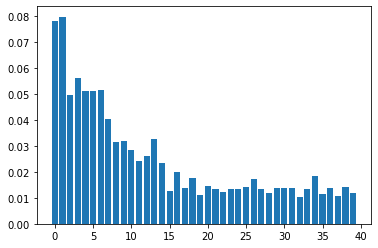

In [110]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # train/test
from sklearn.datasets import load_wine # dataset 
from sklearn.metrics import accuracy_score, confusion_matrix # 평가 : 분류정확도 
from sklearn.metrics import classification_report # 평가 : 정확률, 재현율, f1_score

df = pd.read_csv("data/finalservey_1912_clean.csv")
def rating(mens_cramp):
    if mens_cramp >= 8: return 2
    elif mens_cramp >= 7: return 1
    else: return 0
df['mens_cramp_rank'] = df.apply(lambda x: rating(x['mens_cramp']),axis=1)

x = df[['mens_cramps_level_before_meal_exercise', 'mens_stress', 'mens_cramps_level_after_meal_exercise', 'bmi', 'height_1', 'age', 'weight_1', 'lower_body_size', 'upper_body_size', 'mens_cycle', 'menarche_age', 'pain_after', 'mens_exercise', 'mens_period', 'mens_meal', 'mens_symptoms_3_ovulation_cramps', 'meal_exercise_effects', 'mens_cramp_symptoms_reduced_temperance', 'mens_cramps_family_no', 'meal_exercise_effects_specific_no_pms', 'exercise_type_bicycle', 'meal_exercise_effects_c', 'mens_stress_peak_before', 'exercise_type_yoga_pilates', 'mens_cramp_symptoms_lethargy', 'options_abdominal_obesity', 'mens_symptoms_3_pressure', 'mens_cramps_family_relatives', 'options_tension', 'meal_exercise_effects_specific_reduced_stress', 'mens_symptoms_3_abnormal', 'mens_cramp_symptoms_diarrhea', 'mens_symptoms_3_pelvis_pain', 'mens_cramp_part_waist', 'mens_cramp_symptoms_exhaustion', 'mens_cramp_peak_second_day', 'mens_before_after_pattern_help', 'mens_cramp_symptoms_colic', 'mens_before_after_pattern_borrow_pads', 'mens_symptoms_3_gas']]
y = df['mens_cramp_rank']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_pred, y_test))

con_mat = confusion_matrix(y_pred, y_test)
print(con_mat)

report = classification_report(y_pred, y_test)
print(report)

result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})
result

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [47]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)
x.dtypes

height_1                                          float64
weight_1                                          float64
bmi                                               float64
mens_period                                       float64
mens_cycle                                          int64
age                                                 int64
upper_body_size                                     int64
lower_body_size                                     int64
options_tension                                     int64
options_stiffness                                   int64
options_diarrhea                                    int64
options_insomnia                                    int64
options_abdominal_obesity                           int64
options_swelling                                    int64
options_cold                                        int64
exercise_type_walking                               int64
exercise_type_running                               int64
exercise_type_

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("data/test1.csv")
def rating(mens_cramp):
    if mens_cramp >= 8: return 2
    elif mens_cramp >= 7: return 1
    else: return 0
df['mens_cramp_rank'] = df.apply(lambda x: rating(x['mens_cramp']),axis=1)

x = df[['height', 'weight', 'mens_cycle', 'mens_period', 'menarche_age', 'bmi', 'thyroid_hyperthyroidism', 'thyroid_cancer', 'mens_cramp_symptoms_emotion', 'mens_cramp_symptoms_lethargy', 'mens_cramp_symptoms_nervousness', 'mens_cramp_symptoms_gas', 'mens_cramp_symptoms_digestive_upset', 'mens_cramp_symptoms_headache', 'mens_cramp_symptoms_depression', 'mens_cramp_symptoms_migraine',  'mens_cramp_symptoms_drowsiness', 'mens_cramp_symptoms_sensitive_temperature', 'mens_cramp_symptoms_leg_numbness', 'mens_cramp_symptoms_leg_swelling', 'mens_cramp_symptoms_voracity', 'mens_cramp_symptoms_insomnia', 'mens_cramp_symptoms_excessive_sleep', 'mens_cramp_symptoms_pimple', 'mens_cramp_symptoms_sickness', 'mens_cramp_symptoms_gastrointestinal_disorder', 'mens_cramp_symptoms_muscle_pain', 'mens_cramp_symptoms_increased_libido', 'mens_cramp_symptoms_dizziness', 'mens_cramp_symptoms_throw_up', 'mens_cramp_symptoms_anemia', 'mens_cramp_symptoms_whirl', 'mens_cramp_symptoms_joint_pain', 'mens_cramp_symptoms_fever', 'mens_cramp_symptoms_chill', 'mens_cramp_symptoms_orthostatic_hypotension', 'mens_symptoms_3_gas', 'mens_before_after_pattern_keen', 'mens_before_after_pattern_partying', 'mens_before_after_pattern_comfy_clothes', 'mens_before_after_pattern_dark_clothes', 'mens_before_after_pattern_accessory']]
y = df['mens_cramp_rank']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = RandomForestClassifier(n_estimators = 400)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy is: ", accuracy_score(y_pred, y_test))

result = pd.DataFrame({'pred' : y_pred, 'real' : y_test})

result

Accuracy is:  0.45454545454545453


,pred,real
56,2,2
44,1,1
29,1,1
32,0,0
12,0,0
46,0,1
63,0,1
55,1,0
11,1,2
27,1,0
